In [1]:
import os
os.chdir('..')
%load_ext autoreload
%autoreload 2

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

from src import data_store, analysis

In [160]:
data_store.create_store()

In [161]:
dfi, dfe = data_store.read_store()

In [154]:
dfi.shape, dfe.shape

((99012, 24), (21294, 14))

In [155]:
dfe.head().T

,0,1,2,3,4
Individual,1,1,1,1,1
Index,0,1,2,3,4
Hemisphere,R,R,R,R,R
Label,26,27,28,29,30
Abbreviation,AI,AIP,A1/2,A3a,A3b
Description,Agranular insular cortex,Anterior intraparietal area of cortex,Areas 1 and 2 of cortex,Area 3a of cortex (primary somatosensory),Area 3b of cortex (primary somatosensory)
Volume (mm^3),2.2111,5.21333,19.7338,28.5443,27.4654
T2w Average Value,6774.953643,6038.539667,5743.293233,5412.569234,5529.211299
ex vivo Database Number,ex001,ex001,ex001,ex001,ex001
Age,5.073973,5.073973,5.073973,5.073973,5.073973


In [156]:
dfi.head().T

,0,1,2,3,4
Individual,1,1,1,1,1
Index,0,1,2,3,4
Hemisphere,R,R,R,R,R
Label,5,7,21,26,27
Abbreviation,OB,AON,Tu,AI,AIP
Description,Olfactory bulb,Anterior olfactory nucleus,Olfactory tubercle,Agranular insular cortex,Anterior intraparietal area of cortex
Volume (mm^3),4.13786,0.994186,4.828,2.01983,4.76886
T1w Average Value,1574.809201,2069.793781,3090.76222,1979.295287,1916.75998
T2w Average Value,11590.290633,10703.429741,11131.938691,11144.947842,9975.528743
T1w/T2w Average Value,0.138592,0.195689,0.278003,0.178091,0.194582


In [177]:
variable

'Volume (mm^3)'

In [176]:
dfe[dfe[variable] > 1000][variable]

238      9.098250e+36
1406     2.247980e+36
1409     1.286980e+36
1481     6.176970e+36
1523     1.858450e+36
1525     6.397780e+36
1598     6.713070e+36
1874     1.302500e+36
1875     4.326820e+36
1876     2.222350e+36
1877     9.910700e+35
1949     3.369960e+36
1991     1.176800e+36
1992     5.497530e+36
1993     3.017640e+36
1994     3.321900e+36
2066     7.372130e+36
10067    1.236460e+36
10140    2.101800e+35
10256    3.436060e+37
10257    5.531070e+36
10532    7.451110e+35
10533    6.150110e+36
10534    4.828530e+36
10535    4.606400e+36
10607    3.492820e+36
10649    1.138720e+36
10650    9.166220e+36
10651    5.431970e+36
10652    3.779480e+36
10724    4.657480e+36
Name: Volume (mm^3), dtype: float64

<Axes: xlabel='Hemisphere', ylabel='Volume (mm^3)'>

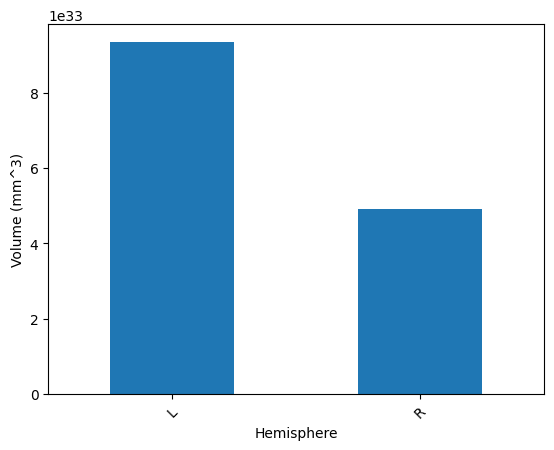

In [167]:
variable = 'Volume (mm^3)'
groupby = 'Description'
groupby = 'Hemisphere'
# groupby = 'Weight'

# variable = 'Description'
# groupby = 'Volume (mm^3)'

ss = analysis.make_groupby(dfe, variable, groupby)
ss.plot(kind='bar', rot=45, ylabel=variable)